In [12]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
sns.set()
from matplotlib import pyplot as plt
%matplotlib inline

In [13]:
#Reading Data
df = pd.read_csv('data.csv')
len(df)

11914

In [14]:
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [15]:
len(df.columns)

16

In [16]:
df.columns

Index(['Make', 'Model', 'Year', 'Engine Fuel Type', 'Engine HP',
       'Engine Cylinders', 'Transmission Type', 'Driven_Wheels',
       'Number of Doors', 'Market Category', 'Vehicle Size', 'Vehicle Style',
       'highway MPG', 'city mpg', 'Popularity', 'MSRP'],
      dtype='object')

In [17]:
df.info

<bound method DataFrame.info of           Make       Model  Year                Engine Fuel Type  Engine HP  \
0          BMW  1 Series M  2011     premium unleaded (required)      335.0   
1          BMW    1 Series  2011     premium unleaded (required)      300.0   
2          BMW    1 Series  2011     premium unleaded (required)      300.0   
3          BMW    1 Series  2011     premium unleaded (required)      230.0   
4          BMW    1 Series  2011     premium unleaded (required)      230.0   
...        ...         ...   ...                             ...        ...   
11909    Acura         ZDX  2012     premium unleaded (required)      300.0   
11910    Acura         ZDX  2012     premium unleaded (required)      300.0   
11911    Acura         ZDX  2012     premium unleaded (required)      300.0   
11912    Acura         ZDX  2013  premium unleaded (recommended)      300.0   
11913  Lincoln      Zephyr  2006                regular unleaded      221.0   

       Engine Cylin

In [18]:
for col in df.columns:
    print(col,':' ,df[col].nunique())
    print(df[col].value_counts().nlargest(5))
    print('\n' + '*' * 20 + '\n')

Make : 48
Chevrolet     1123
Ford           881
Volkswagen     809
Toyota         746
Dodge          626
Name: Make, dtype: int64

********************

Model : 915
Silverado 1500        156
Tundra                140
F-150                 126
Sierra 1500            90
Beetle Convertible     89
Name: Model, dtype: int64

********************

Year : 28
2015    2170
2016    2157
2017    1668
2014     589
2012     387
Name: Year, dtype: int64

********************

Engine Fuel Type : 10
regular unleaded                  7172
premium unleaded (required)       2009
premium unleaded (recommended)    1523
flex-fuel (unleaded/E85)           899
diesel                             154
Name: Engine Fuel Type, dtype: int64

********************

Engine HP : 356
200.0    456
170.0    351
210.0    320
240.0    268
285.0    246
Name: Engine HP, dtype: int64

********************

Engine Cylinders : 9
4.0     4752
6.0     4489
8.0     2031
12.0     230
5.0      225
Name: Engine Cylinders, dtype: int64

In [19]:
#Some Cleaning
df.columns = df.columns.str.lower().str.replace(' ', '_')

string_columns = list(df.dtypes[df.dtypes == 'object'].index)
print(string_columns)
for col in string_columns:
    df[col] = df[col].str.lower().str.replace(' ', '_')

['make', 'model', 'engine_fuel_type', 'transmission_type', 'driven_wheels', 'market_category', 'vehicle_size', 'vehicle_style']


In [20]:
df.columns

Index(['make', 'model', 'year', 'engine_fuel_type', 'engine_hp',
       'engine_cylinders', 'transmission_type', 'driven_wheels',
       'number_of_doors', 'market_category', 'vehicle_size', 'vehicle_style',
       'highway_mpg', 'city_mpg', 'popularity', 'msrp'],
      dtype='object')

In [21]:
df.rename(columns = {'msrp': 'price'}, inplace = True)

In [22]:
df.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,price
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500


In [24]:
# Exploratory Data Analysis

pd.options.display.float_format = '{:,.2f}'.format
df.describe()

,year,engine_hp,engine_cylinders,number_of_doors,highway_mpg,city_mpg,popularity,price
count,"11,914.00","11,845.00","11,884.00","11,908.00","11,914.00","11,914.00","11,914.00","11,914.00"
mean,"2,010.38",249.39,5.63,3.44,26.64,19.73,"1,554.91","40,594.74"
std,7.58,109.19,1.78,0.88,8.86,8.99,"1,441.86","60,109.10"
min,"1,990.00",55.00,0.00,2.00,12.00,7.00,2.00,"2,000.00"
25%,"2,007.00",170.00,4.00,2.00,22.00,16.00,549.00,"21,000.00"
50%,"2,015.00",227.00,6.00,4.00,26.00,18.00,"1,385.00","29,995.00"
75%,"2,016.00",300.00,6.00,4.00,30.00,22.00,"2,009.00","42,231.25"
max,"2,017.00","1,001.00",16.00,4.00,354.00,137.00,"5,657.00","2,065,902.00"


In [25]:
df.describe(include=['O'])

,make,model,engine_fuel_type,transmission_type,driven_wheels,market_category,vehicle_size,vehicle_style
count,11914,11914,11911,11914,11914,8172,11914,11914
unique,48,914,10,5,4,71,3,16
top,chevrolet,silverado_1500,regular_unleaded,automatic,front_wheel_drive,crossover,compact,sedan
freq,1123,156,7172,8266,4787,1110,4764,3048


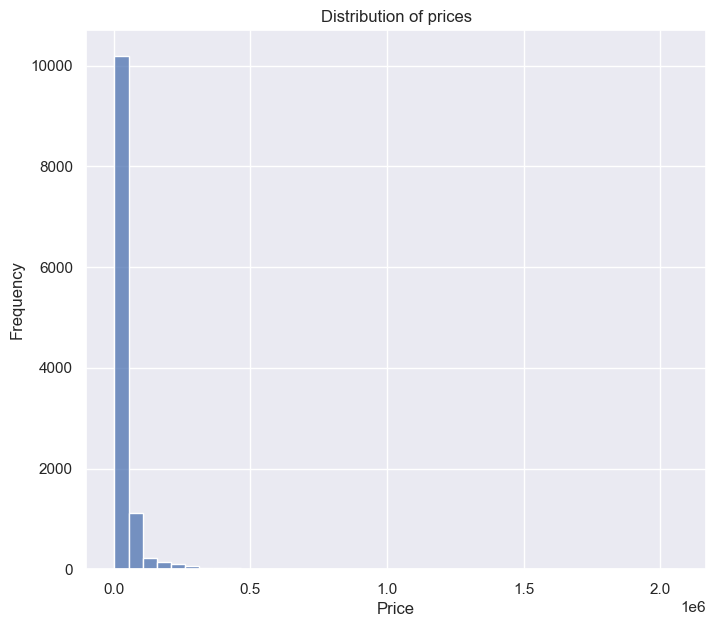

In [29]:
# Target variable analysis (price)
plt.figure(figsize=(8, 7))

sns.histplot(df.price, bins=40)
plt.ylabel('Frequency')
plt.xlabel('Price')
plt.title('Distribution of prices')

plt.show()

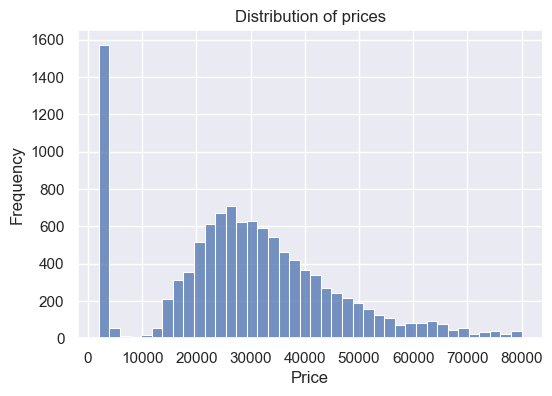

In [30]:
plt.figure(figsize=(6, 4))

sns.histplot(df.price[df.price < 80000], bins=40)
plt.ylabel('Frequency')
plt.xlabel('Price')
plt.title('Distribution of prices')

plt.show()

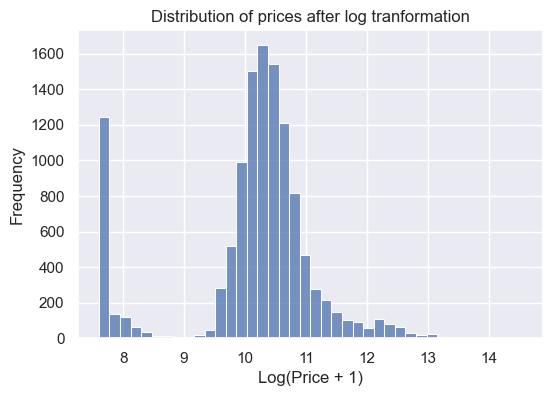

In [31]:
# Log Transformation

df['log_price'] = np.log1p(df.price)

plt.figure(figsize=(6, 4))

sns.histplot(df.log_price, bins=40)
plt.ylabel('Frequency')
plt.xlabel('Log(Price + 1)')
plt.title('Distribution of prices after log tranformation')

plt.show()

In [32]:
df.price.skew()

11.771987129334972

In [33]:
df.log_price.skew()

-0.9178678067039072

In [35]:
# Check missing values

df.isnull().sum()

make                    0
model                   0
year                    0
engine_fuel_type        3
engine_hp              69
engine_cylinders       30
transmission_type       0
driven_wheels           0
number_of_doors         6
market_category      3742
vehicle_size            0
vehicle_style           0
highway_mpg             0
city_mpg                0
popularity              0
price                   0
log_price               0
dtype: int64

In [36]:
# Check categorical columns
string_columns

['make',
 'model',
 'engine_fuel_type',
 'transmission_type',
 'driven_wheels',
 'market_category',
 'vehicle_size',
 'vehicle_style']

In [37]:
# What's the average price of BMW cars in the dataset?
df.make.value_counts()

chevrolet        1123
ford              881
volkswagen        809
toyota            746
dodge             626
nissan            558
gmc               515
honda             449
mazda             423
cadillac          397
mercedes-benz     353
suzuki            351
bmw               334
infiniti          330
audi              328
hyundai           303
volvo             281
subaru            256
acura             252
kia               231
mitsubishi        213
lexus             202
buick             196
chrysler          187
pontiac           186
lincoln           164
oldsmobile        150
land_rover        143
porsche           136
saab              111
aston_martin       93
plymouth           82
bentley            74
ferrari            69
fiat               62
scion              60
maserati           58
lamborghini        52
rolls-royce        31
lotus              29
tesla              18
hummer             17
maybach            16
alfa_romeo          5
mclaren             5
spyker    

In [38]:
df.groupby('make').mean()

,year,engine_hp,engine_cylinders,number_of_doors,highway_mpg,city_mpg,popularity,price,log_price
make,,,,,,,,,
acura,"2,010.06",244.80,5.33,3.62,28.11,19.94,204.00,"34,887.59",10.14
alfa_romeo,"2,015.40",237.00,4.00,2.00,34.00,24.00,113.00,"61,600.00",11.02
aston_martin,"2,013.02",484.32,10.62,2.15,18.89,12.53,259.00,"197,910.38",12.14
audi,"2,012.23",277.70,5.56,3.47,28.82,19.59,"3,105.00","53,452.11",10.48
bentley,"2,011.70",533.85,9.73,2.68,18.91,11.55,520.00,"247,169.32",12.40
bmw,"2,014.35",326.91,5.96,3.16,29.25,20.74,"3,916.00","61,546.76",10.91
bugatti,"2,008.33","1,001.00",16.00,2.00,14.00,8.00,820.00,"1,757,223.67",14.37
buick,"2,010.01",219.24,5.32,3.84,26.95,18.70,155.00,"28,206.61",9.96
cadillac,"2,013.15",332.31,6.43,3.60,25.24,17.36,"1,624.00","56,231.32",10.81


In [39]:
df.groupby('make').mean()['price']['bmw']

61546.76347305389

In [40]:
# Compare the average price for cars before / after year 2015
df[df['year'] >= 2015]

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,price,log_price
32,fiat,124_spider,2017,premium_unleaded_(recommended),160.00,4.00,manual,rear_wheel_drive,2.00,performance,compact,convertible,35,26,819,27495,10.22
33,fiat,124_spider,2017,premium_unleaded_(recommended),160.00,4.00,manual,rear_wheel_drive,2.00,performance,compact,convertible,35,26,819,24995,10.13
34,fiat,124_spider,2017,premium_unleaded_(recommended),160.00,4.00,manual,rear_wheel_drive,2.00,performance,compact,convertible,35,26,819,28195,10.25
41,bmw,2_series,2016,premium_unleaded_(required),240.00,4.00,automatic,rear_wheel_drive,2.00,"luxury,performance",compact,coupe,35,23,3916,32850,10.40
42,bmw,2_series,2016,premium_unleaded_(required),240.00,4.00,automatic,rear_wheel_drive,2.00,luxury,compact,convertible,34,23,3916,38650,10.56
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11898,bmw,z4,2015,premium_unleaded_(required),300.00,6.00,automated_manual,rear_wheel_drive,2.00,"luxury,high-performance",compact,convertible,24,17,3916,56950,10.95
11899,bmw,z4,2015,premium_unleaded_(required),335.00,6.00,automated_manual,rear_wheel_drive,2.00,"luxury,high-performance",compact,convertible,24,17,3916,65800,11.09
11900,bmw,z4,2016,premium_unleaded_(required),300.00,6.00,automated_manual,rear_wheel_drive,2.00,"luxury,high-performance",compact,convertible,24,17,3916,57500,10.96
11901,bmw,z4,2016,premium_unleaded_(required),240.00,4.00,manual,rear_wheel_drive,2.00,"luxury,performance",compact,convertible,34,22,3916,49700,10.81


In [41]:
df.price.mean()

40594.737032063116

In [42]:
df[df['year'] >= 2015]['price'].mean()

45667.156463719766

In [43]:
df[df['year'] < 2015]['price'].mean()

35457.18770062511

In [44]:
np.random.seed(2)     # Fixes the random seed to make sure that the results are reproducible

n = len(df) 

n_val = int(0.2 * n)
n_test = int(0.2 * n)
n_train = n - (n_val + n_test)

print('No. of rows for training : ', n_train)
print('No. of rows for validation : ', n_val)
print('No. of rows for testing : ', n_test)

No. of rows for training :  7150
No. of rows for validation :  2382
No. of rows for testing :  2382


In [45]:
idx = np.arange(n)
print(idx)
np.random.shuffle(idx)
print(idx)

[    0     1     2 ... 11911 11912 11913]
[2735 6720 5878 ... 6637 2575 7336]


In [47]:
df_shuffled = df.iloc[idx]
print(df.index)
print(df_shuffled.index)

RangeIndex(start=0, stop=11914, step=1)
Int64Index([ 2735,  6720,  5878, 11190,  4554,  8001,  2882,   649,   616,
             4459,
            ...
             6751,   433,  4770, 11527,  1099,  2514, 11798,  6637,  2575,
             7336],
           dtype='int64', length=11914)


In [48]:
df_shuffled

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,price,log_price
2735,chevrolet,cobalt,2008,regular_unleaded,148.00,4.00,manual,front_wheel_drive,2.00,NaN,compact,coupe,33,24,1385,14410,9.58
6720,toyota,matrix,2012,regular_unleaded,132.00,4.00,automatic,front_wheel_drive,4.00,hatchback,compact,4dr_hatchback,32,25,2031,19685,9.89
5878,subaru,impreza,2016,regular_unleaded,148.00,4.00,automatic,all_wheel_drive,4.00,hatchback,compact,4dr_hatchback,37,28,640,19795,9.89
11190,volkswagen,vanagon,1991,regular_unleaded,90.00,4.00,manual,rear_wheel_drive,3.00,NaN,large,passenger_minivan,18,16,873,2000,7.60
4554,ford,f-150,2017,flex-fuel_(unleaded/e85),385.00,8.00,automatic,four_wheel_drive,4.00,flex_fuel,large,crew_cab_pickup,21,15,5657,56260,10.94
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2514,chevrolet,chevy_van,1998,regular_unleaded,200.00,6.00,automatic,rear_wheel_drive,3.00,NaN,midsize,cargo_van,18,13,1385,2052,7.63
11798,subaru,xv_crosstrek,2014,regular_unleaded,160.00,4.00,automatic,all_wheel_drive,4.00,"crossover,hybrid",compact,4dr_suv,33,29,640,25995,10.17
6637,dodge,magnum,2006,regular_unleaded,250.00,6.00,automatic,all_wheel_drive,4.00,NaN,large,wagon,22,15,1851,29100,10.28
2575,honda,civic,2016,regular_unleaded,174.00,4.00,automatic,front_wheel_drive,4.00,NaN,midsize,sedan,42,31,2202,22200,10.01


In [49]:
df

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,price,log_price
0,bmw,1_series_m,2011,premium_unleaded_(required),335.00,6.00,manual,rear_wheel_drive,2.00,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135,10.74
1,bmw,1_series,2011,premium_unleaded_(required),300.00,6.00,manual,rear_wheel_drive,2.00,"luxury,performance",compact,convertible,28,19,3916,40650,10.61
2,bmw,1_series,2011,premium_unleaded_(required),300.00,6.00,manual,rear_wheel_drive,2.00,"luxury,high-performance",compact,coupe,28,20,3916,36350,10.50
3,bmw,1_series,2011,premium_unleaded_(required),230.00,6.00,manual,rear_wheel_drive,2.00,"luxury,performance",compact,coupe,28,18,3916,29450,10.29
4,bmw,1_series,2011,premium_unleaded_(required),230.00,6.00,manual,rear_wheel_drive,2.00,luxury,compact,convertible,28,18,3916,34500,10.45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,acura,zdx,2012,premium_unleaded_(required),300.00,6.00,automatic,all_wheel_drive,4.00,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,46120,10.74
11910,acura,zdx,2012,premium_unleaded_(required),300.00,6.00,automatic,all_wheel_drive,4.00,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,56670,10.95
11911,acura,zdx,2012,premium_unleaded_(required),300.00,6.00,automatic,all_wheel_drive,4.00,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,50620,10.83
11912,acura,zdx,2013,premium_unleaded_(recommended),300.00,6.00,automatic,all_wheel_drive,4.00,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,50920,10.84


In [50]:
df_train = df_shuffled.iloc[:n_train].copy()
df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
df_test = df_shuffled.iloc[n_train+n_val:].copy()

In [51]:
df_train.shape

(7150, 17)

In [52]:
df_val.shape

(2382, 17)

In [53]:
df_test.shape

(2382, 17)

In [55]:
y_train = df_train.log_price.values
y_val = df_val.log_price.values
y_test = df_test.log_price.values

In [56]:
## modeling
#Baseline solution
base = ['engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg', 'popularity'] 

In [57]:
df[base]

,engine_hp,engine_cylinders,highway_mpg,city_mpg,popularity
0,335.00,6.00,26,19,3916
1,300.00,6.00,28,19,3916
2,300.00,6.00,28,20,3916
3,230.00,6.00,28,18,3916
4,230.00,6.00,28,18,3916
...,...,...,...,...,...
11909,300.00,6.00,23,16,204
11910,300.00,6.00,23,16,204
11911,300.00,6.00,23,16,204
11912,300.00,6.00,23,16,204


In [58]:
df[base].isnull().sum()

engine_hp           69
engine_cylinders    30
highway_mpg          0
city_mpg             0
popularity           0
dtype: int64

In [59]:
# Handling Missing Values

def prepare_X(df):
    df_num = df[base]
    df_num = df_num.fillna(df_num.mean())
    X = df_num.values
    return X

In [60]:
df_train.corr()

,year,engine_hp,engine_cylinders,number_of_doors,highway_mpg,city_mpg,popularity,price,log_price
year,1.00,0.36,-0.04,0.26,0.25,0.20,0.08,0.22,0.77
engine_hp,0.36,1.00,0.78,-0.10,-0.39,-0.44,0.04,0.65,0.68
engine_cylinders,-0.04,0.78,1.00,-0.14,-0.60,-0.60,0.04,0.51,0.35
number_of_doors,0.26,-0.10,-0.14,1.00,0.11,0.12,-0.05,-0.12,0.11
highway_mpg,0.25,-0.39,-0.60,0.11,1.00,0.86,-0.02,-0.15,-0.01
city_mpg,0.20,-0.44,-0.60,0.12,0.86,1.00,0.00,-0.15,-0.03
popularity,0.08,0.04,0.04,-0.05,-0.02,0.00,1.00,-0.04,0.01
price,0.22,0.65,0.51,-0.12,-0.15,-0.15,-0.04,1.00,0.58
log_price,0.77,0.68,0.35,0.11,-0.01,-0.03,0.01,0.58,1.00


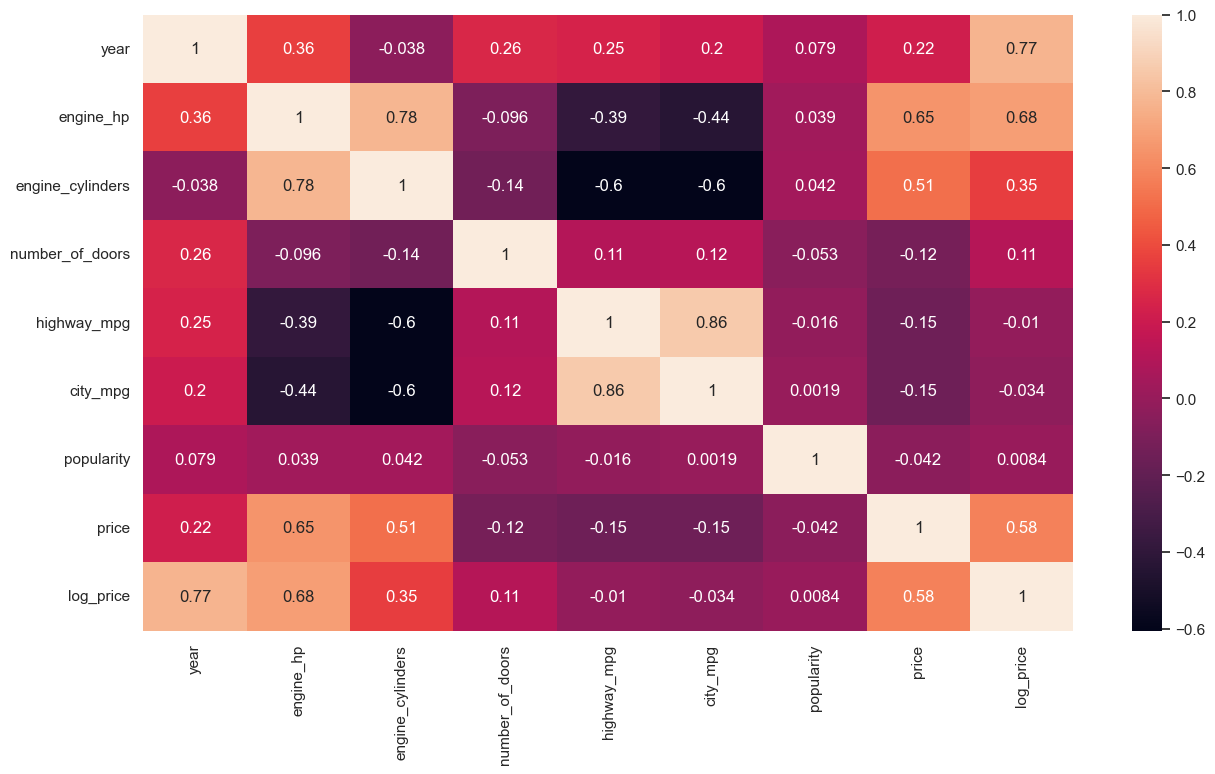

In [61]:
plt.figure(figsize=(15,8))
_=sns.heatmap(df_train.corr(), annot = True)

In [62]:
def linear_regression(xi):
    n =len(xi)                # Number of features used
    
    pred = w0                 # Initial / Base prediction
    
    for j in range(n):
        pred += w[j]*xi[j]     # Formula = w0 +sigma[0:n-1]{w[j]*xi[j]}
    
    return pred

In [63]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [64]:
X_train = prepare_X(df_train)
w_0, w = train_linear_regression(X_train, y_train)
y_pred = w_0 + X_train.dot(w)

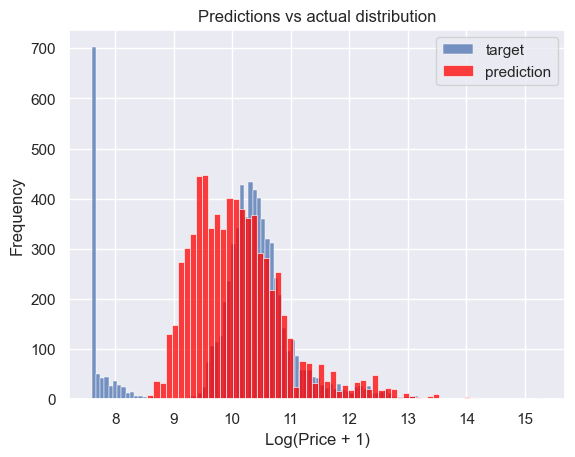

In [65]:
sns.histplot(y_train, label='target')
sns.histplot(y_pred, label='prediction', color='red')

plt.legend()

plt.ylabel('Frequency')
plt.xlabel('Log(Price + 1)')
plt.title('Predictions vs actual distribution')

plt.show()


In [66]:
# Model Evaluation
def rmse(y, y_pred):
    error = y_pred - y
    mse = (error ** 2).mean()
    return np.sqrt(mse)

In [67]:
rmse(y_train, y_pred)

0.7574439819012008

In [68]:
X_val = prepare_X(df_val)
y_pred = w_0 + X_val.dot(w)

In [69]:
rmse(y_val, y_pred)

0.7502502346381926

In [70]:
base

['engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg', 'popularity']

In [71]:
sorted(df.year.unique())

[1990,
 1991,
 1992,
 1993,
 1994,
 1995,
 1996,
 1997,
 1998,
 1999,
 2000,
 2001,
 2002,
 2003,
 2004,
 2005,
 2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013,
 2014,
 2015,
 2016,
 2017]

In [72]:
def prepare_X(df):
    df = df.copy()
    features = base.copy()

    df['age'] = 2017 - df.year    # Because the dataset was created in 2017 (which we can verify by checking df_train.year.max())
    features.append('age')
    
    df_num = df[features]
    df_num = df_num.fillna(df_num.mean())
    X = df_num.values
    return X

In [73]:
X_train = prepare_X(df_train)
w_0, w = train_linear_regression(X_train, y_train)
y_pred = w_0 + X_train.dot(w)
print('Train RMSE: ', rmse(y_train, y_pred))

X_val = prepare_X(df_val)
y_pred = w_0 + X_val.dot(w)
print('Validation RMSE: ', rmse(y_val, y_pred))

Train RMSE:  0.5117454503079417
Validation RMSE:  0.5070033906013027


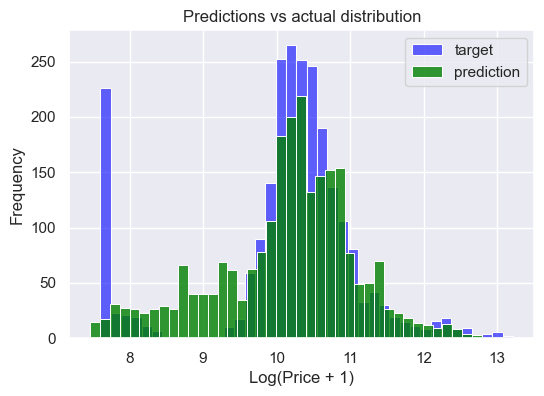

In [74]:
plt.figure(figsize=(6, 4))


sns.histplot(y_val, label='target', color='blue', alpha=0.6, bins=40)
sns.histplot(y_pred, label='prediction', color='green', alpha=0.8, bins=40)

plt.legend()

plt.ylabel('Frequency')
plt.xlabel('Log(Price + 1)')
plt.title('Predictions vs actual distribution')

plt.show()

In [75]:
df.number_of_doors.value_counts()

4.00    8353
2.00    3160
3.00     395
Name: number_of_doors, dtype: int64

In [76]:
df['make'].value_counts().head(10)

chevrolet     1123
ford           881
volkswagen     809
toyota         746
dodge          626
nissan         558
gmc            515
honda          449
mazda          423
cadillac       397
Name: make, dtype: int64

In [77]:
def prepare_X(df):
    df = df.copy()
    features = base.copy()

    df['age'] = 2017 - df.year
    features.append('age')

    for v in [2, 3, 4]:
        feature = 'num_doors_%s' % v
        df[feature] = (df['number_of_doors'] == v).astype(int)
        features.append(feature)

    for v in ['chevrolet', 'ford', 'volkswagen', 'toyota', 'dodge']:
        feature = 'is_make_%s' % v
        df[feature] = (df['make'] == v).astype(int)
        features.append(feature)

    df_num = df[features]
    df_num = df_num.fillna(df_num.mean())
    X = df_num.values
    return X

In [78]:
X_train = prepare_X(df_train)
w_0, w = train_linear_regression(X_train, y_train)

y_pred = w_0 + X_train.dot(w)
print('train:', rmse(y_train, y_pred))

X_val = prepare_X(df_val)
y_pred = w_0 + X_val.dot(w)
print('validation:', rmse(y_val, y_pred))

train: 0.5010764007201611
validation: 0.4982643557276847


In [79]:
df['engine_fuel_type'].value_counts()

regular_unleaded                                7172
premium_unleaded_(required)                     2009
premium_unleaded_(recommended)                  1523
flex-fuel_(unleaded/e85)                         899
diesel                                           154
electric                                          66
flex-fuel_(premium_unleaded_required/e85)         54
flex-fuel_(premium_unleaded_recommended/e85)      26
flex-fuel_(unleaded/natural_gas)                   6
natural_gas                                        2
Name: engine_fuel_type, dtype: int64

In [80]:
def prepare_X(df):
    df = df.copy()
    features = base.copy()

    df['age'] = 2017 - df.year
    features.append('age')
    
    for v in [2, 3, 4]:
        feature = 'num_doors_%s' % v
        df[feature] = (df['number_of_doors'] == v).astype(int)
        features.append(feature)

    for v in ['chevrolet', 'ford', 'volkswagen', 'toyota', 'dodge']:
        feature = 'is_make_%s' % v
        df[feature] = (df['make'] == v).astype(int)
        features.append(feature)

    for v in ['regular_unleaded', 'premium_unleaded_(required)', 
              'premium_unleaded_(recommended)', 'flex-fuel_(unleaded/e85)']:
        feature = 'is_type_%s' % v
        df[feature] = (df['engine_fuel_type'] == v).astype(int)
        features.append(feature)
        
    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [81]:
X_train = prepare_X(df_train)
w_0, w = train_linear_regression(X_train, y_train)

y_pred = w_0 + X_train.dot(w)
print('train:', rmse(y_train, y_pred))

X_val = prepare_X(df_val)
y_pred = w_0 + X_val.dot(w)
print('validation:', rmse(y_val, y_pred))

train: 0.4788482615078598
validation: 0.4748256737227088


In [82]:
df['transmission_type'].value_counts()

automatic           8266
manual              2935
automated_manual     626
direct_drive          68
unknown               19
Name: transmission_type, dtype: int64

In [83]:
df['driven_wheels'].value_counts()

front_wheel_drive    4787
rear_wheel_drive     3371
all_wheel_drive      2353
four_wheel_drive     1403
Name: driven_wheels, dtype: int64

In [84]:
df['market_category'].value_counts().head(5)

crossover             1110
flex_fuel              872
luxury                 855
luxury,performance     673
hatchback              641
Name: market_category, dtype: int64

In [85]:
df['vehicle_size'].value_counts().head(5)

compact    4764
midsize    4373
large      2777
Name: vehicle_size, dtype: int64

In [86]:
df['vehicle_style'].value_counts().head(5)

sedan            3048
4dr_suv          2488
coupe            1211
convertible       793
4dr_hatchback     702
Name: vehicle_style, dtype: int64

In [87]:
def prepare_X(df):
    df = df.copy()
    features = base.copy()

    df['age'] = 2017 - df.year
    features.append('age')
    
    for v in [2, 3, 4]:
        feature = 'num_doors_%s' % v
        df[feature] = (df['number_of_doors'] == v).astype(int)
        features.append(feature)

    for v in ['chevrolet', 'ford', 'volkswagen', 'toyota', 'dodge']:
        feature = 'is_make_%s' % v
        df[feature] = (df['make'] == v).astype(int)
        features.append(feature)

    for v in ['regular_unleaded', 'premium_unleaded_(required)', 
              'premium_unleaded_(recommended)', 'flex-fuel_(unleaded/e85)']:
        feature = 'is_type_%s' % v
        df[feature] = (df['engine_fuel_type'] == v).astype(int)
        features.append(feature)

    for v in ['automatic', 'manual', 'automated_manual']:
        feature = 'is_transmission_%s' % v
        df[feature] = (df['transmission_type'] == v).astype(int)
        features.append(feature)
        
    df_num = df[features]
    df_num = df_num.fillna(df_num.mean())
    X = df_num.values
    return X

In [88]:
X_train = prepare_X(df_train)
w_0, w = train_linear_regression(X_train, y_train)

y_pred = w_0 + X_train.dot(w)
print('train:', rmse(y_train, y_pred))

X_val = prepare_X(df_val)
y_pred = w_0 + X_val.dot(w)
print('validation:', rmse(y_val, y_pred))


train: 0.47227213583716005
validation: 0.4653694386689745


In [89]:
def prepare_X(df):
    df = df.copy()
    features = base.copy()

    df['age'] = 2017 - df.year
    features.append('age')
    
    for v in [2, 3, 4]:
        feature = 'num_doors_%s' % v
        df[feature] = (df['number_of_doors'] == v).astype(int)
        features.append(feature)

    for v in ['chevrolet', 'ford', 'volkswagen', 'toyota', 'dodge']:
        feature = 'is_make_%s' % v
        df[feature] = (df['make'] == v).astype(int)
        features.append(feature)

    for v in ['regular_unleaded', 'premium_unleaded_(required)', 
              'premium_unleaded_(recommended)', 'flex-fuel_(unleaded/e85)']:
        feature = 'is_type_%s' % v
        df[feature] = (df['engine_fuel_type'] == v).astype(int)
        features.append(feature)

    for v in ['automatic', 'manual', 'automated_manual']:
        feature = 'is_transmission_%s' % v
        df[feature] = (df['transmission_type'] == v).astype(int)
        features.append(feature)

    for v in ['front_wheel_drive', 'rear_wheel_drive', 'all_wheel_drive', 'four_wheel_drive']:
        feature = 'is_driven_wheels_%s' % v
        df[feature] = (df['driven_wheels'] == v).astype(int)
        features.append(feature)

    for v in ['crossover', 'flex_fuel', 'luxury', 'luxury,performance', 'hatchback']:
        feature = 'is_mc_%s' % v
        df[feature] = (df['market_category'] == v).astype(int)
        features.append(feature)

    for v in ['compact', 'midsize', 'large']:
        feature = 'is_size_%s' % v
        df[feature] = (df['vehicle_size'] == v).astype(int)
        features.append(feature)

    for v in ['sedan', '4dr_suv', 'coupe', 'convertible', '4dr_hatchback']:
        feature = 'is_style_%s' % v
        df[feature] = (df['vehicle_style'] == v).astype(int)
        features.append(feature)

    df_num = df[features]
    df_num = df_num.fillna(df_num.mean())
    X = df_num.values
    return X

In [90]:
X_train = prepare_X(df_train)
w_0, w = train_linear_regression(X_train, y_train)

y_pred = w_0 + X_train.dot(w)
print('train:', rmse(y_train, y_pred))

X_val = prepare_X(df_val)
y_pred = w_0 + X_val.dot(w)
print('validation:', rmse(y_val, y_pred))

train: 127.80231825683865
validation: 59.95730428656236


In [91]:
w.astype(int)

array([    0,   -26,    -6,    -4,     0,    -4, -4160, -4204, -4167,
          -2,     9,   -44,     3,     0,  -120,  -100,  -129,  -102,
        -182,  -177,  -110,  2320,  2289,  2275,  2274,     2,     3,
          -2,    -3,    -6,    19,    15,    18,     0,     0,     0,
           0,     0])

In [92]:
# Regularization
def train_linear_regression_reg(X, y, r=0.0):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    reg = r * np.eye(XTX.shape[0])
    XTX = XTX + reg

    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [93]:
X_train = prepare_X(df_train)

In [94]:
for r in [0, 0.001, 0.01, 0.1, 1, 10]:
    w_0, w = train_linear_regression_reg(X_train, y_train, r=r)
    print('%5s, %.2f, %.2f, %.2f' % (r, w_0, w[13], w[21]))

    0, 2662.90, -0.36, 2320.30
0.001, 6.96, -0.10, 1.76
 0.01, 6.95, -0.10, 1.76
  0.1, 6.82, -0.10, 1.73
    1, 6.04, -0.10, 1.52
   10, 4.32, -0.09, 1.07


In [95]:
X_train = prepare_X(df_train)
w_0, w = train_linear_regression_reg(X_train, y_train, r=0)

y_pred = w_0 + X_train.dot(w)
print('train', rmse(y_train, y_pred))

X_val = prepare_X(df_val)
y_pred = w_0 + X_val.dot(w)
print('val', rmse(y_val, y_pred))

train 127.80231825683865
val 59.95730428656236


In [96]:
X_train = prepare_X(df_train)
w_0, w = train_linear_regression_reg(X_train, y_train, r=0.01)

y_pred = w_0 + X_train.dot(w)
print('train', rmse(y_train, y_pred))

X_val = prepare_X(df_val)
y_pred = w_0 + X_val.dot(w)
print('val', rmse(y_val, y_pred))

train 0.46234354619881746
val 0.45751588648116087


In [97]:
X_train = prepare_X(df_train)
X_val = prepare_X(df_val)

for r in [0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]:
    w_0, w = train_linear_regression_reg(X_train, y_train, r=r)
    y_pred = w_0 + X_val.dot(w)
    print('%6s' %r, rmse(y_val, y_pred))

 1e-06 0.4575031215151653
0.0001 0.4575033091452472
 0.001 0.45750445506920917
  0.01 0.45751588648116087
   0.1 0.4576325827722054
     1 0.45890469947615015
     5 0.46450155470614624
    10 0.4707849371629508


In [98]:
X_train = prepare_X(df_train)
w_0, w = train_linear_regression_reg(X_train, y_train, r=0.01)

X_val = prepare_X(df_val)
y_pred = w_0 + X_val.dot(w)
print('validation:', rmse(y_val, y_pred))

X_test = prepare_X(df_test)
y_pred = w_0 + X_test.dot(w)
print('test:', rmse(y_test, y_pred))

validation: 0.45751588648116087
test: 0.4546002212509062


In [99]:
# Using the model
i = 2
ad = df_test.iloc[i].to_dict()
ad

{'make': 'toyota',
 'model': 'venza',
 'year': 2013,
 'engine_fuel_type': 'regular_unleaded',
 'engine_hp': 268.0,
 'engine_cylinders': 6.0,
 'transmission_type': 'automatic',
 'driven_wheels': 'all_wheel_drive',
 'number_of_doors': 4.0,
 'market_category': 'crossover,performance',
 'vehicle_size': 'midsize',
 'vehicle_style': 'wagon',
 'highway_mpg': 25,
 'city_mpg': 18,
 'popularity': 2031,
 'price': 31120,
 'log_price': 10.345638111452145}

In [100]:
X_test = prepare_X(pd.DataFrame([ad]))
y_pred = w_0 + X_test.dot(w)
suggestion = np.expm1(y_pred)
suggestion

array([28468.75675794])